Chapter 17

# 核密度估计和累积分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码利用 `KDEUnivariate` 核密度估计和累积分布函数 (CDF) 分析鸢尾花数据集的四个特征分布。首先，它计算并绘制各特征的概率密度函数 (PDF)，然后绘制累积分布函数 (CDF) 以展示数据的累积分布特性。

1. **数据加载与初步设置**：
   - 从 `sklearn` 的 `load_iris` 中导入数据，并将四个特征命名为 `Sepal length, $X_1$`、`Sepal width, $X_2$`、`Petal length, $X_3$`、和 `Petal width, $X_4$`。
   - 使用 `DataFrame` 格式存储数据，以便后续处理和绘制。

2. **核密度估计 (KDE) 概率密度函数 (PDF) 绘制**：
   - 针对每个特征，生成其核密度估计曲线，模拟数据的平滑概率密度函数 $f(x)$。
   - 通过在每个子图上绘制散点标记特征值的具体分布，展示该特征在不同区间的分布密度和离散程度。
   - 设定 KDE 的平滑参数带宽 $bw = 0.5$，控制平滑度。

3. **累积分布函数 (CDF) 绘制**：
   - 计算各特征的累积分布函数 $F(x) = P(X \leq x)$，即每个特征值的累积概率，展示出数据随特征值增加的累积情况。
   - 在 CDF 图中同时展示核密度估计曲线，以便对比数据的累计分布趋势和密度。

4. **图像配置**：
   - 每个子图的 $x$ 轴范围为 $[0,8]$，$y$ 轴范围为 $[0,1]$，以便统一尺度下的对比观察。

最终，这些分布图揭示了每个特征的密度集中位置、数据的分布形状和随特征值的累积增长情况，有助于进一步分析特征间的差异。

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

## 加载鸢尾花数据集

In [3]:
iris = load_iris()  # 从Sklearn库中加载iris数据集

X = iris.data  # 提取数据特征矩阵
y = iris.target  # 提取标签

## 定义特征名称

In [5]:
feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$', 'Petal length, $X_3$', 'Petal width, $X_4$']

In [6]:
## 将特征矩阵X转换为数据框格式
X_df = pd.DataFrame(X, columns=feature_names)  # 创建带特征列的数据框

## 绘制核密度估计图 (KDE)

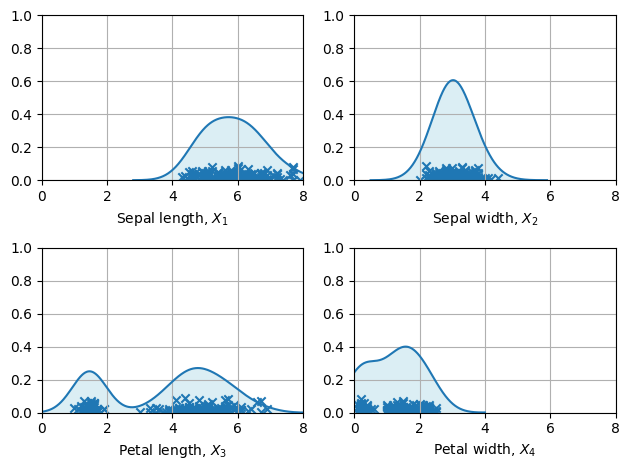

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)  # 创建2x2子图布局
axs = [ax1, ax2, ax3, ax4]  # 定义各子图的轴对象

for name, ax in zip(feature_names, axs):
    df = X_df[name]  # 选择每个特征列的数据
    KDE = sm.nonparametric.KDEUnivariate(df)  # 创建核密度估计对象
    KDE.fit(bw=0.5)  # 拟合核密度估计，设置带宽为0.5

    # 绘制核密度估计图
    ax.fill_between(KDE.support, KDE.density, facecolor='#DBEEF4')  # 填充KDE密度
    ax.plot(KDE.support, KDE.density)  # 绘制密度曲线
    ax.scatter(df, 0.03 * np.abs(np.random.randn(df.size)), marker='x')  # 数据散点图

    ax.grid()  # 显示网格
    ax.autoscale(enable=True, axis='x', tight=True)  # x轴自动缩放
    ax.autoscale(enable=True, axis='y', tight=True)  # y轴自动缩放
    ax.set_ylim([0, 1])  # 设置y轴范围
    ax.set_xlim([0, 8])  # 设置x轴范围
    ax.set_xlabel(name)  # 设置x轴标签为特征名称

plt.tight_layout()  # 紧凑布局

## 累积分布图

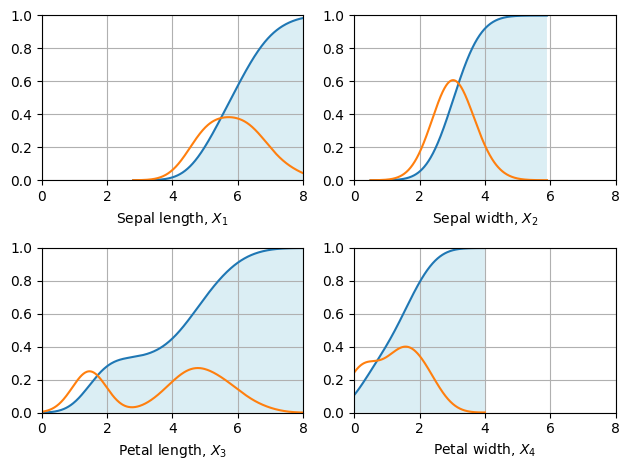

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)  # 创建2x2子图布局
axs = [ax1, ax2, ax3, ax4]  # 定义各子图的轴对象

for name, ax in zip(feature_names, axs):
    df = X_df[name]  # 选择每个特征列的数据
    KDE = sm.nonparametric.KDEUnivariate(df)  # 创建核密度估计对象
    KDE.fit(bw=0.5)  # 拟合核密度估计，设置带宽为0.5

    # 绘制累积分布函数 (CDF) 和密度图
    ax.fill_between(KDE.support, KDE.cdf, facecolor='#DBEEF4')  # 填充累积分布函数
    ax.plot(KDE.support, KDE.cdf)  # 绘制CDF曲线
    ax.plot(KDE.support, KDE.density)  # 绘制密度曲线

    ax.grid()  # 显示网格
    ax.autoscale(enable=True, axis='x', tight=True)  # x轴自动缩放
    ax.autoscale(enable=True, axis='y', tight=True)  # y轴自动缩放
    ax.set_ylim([0, 1])  # 设置y轴范围
    ax.set_xlim([0, 8])  # 设置x轴范围
    ax.set_xlabel(name)  # 设置x轴标签为特征名称

plt.tight_layout()  # 紧凑布局